In [ ]:
# -*- coding : utf-8 -*-
%matplotlib inline

from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import keras.backend as K
from keras import models
import tensorflow as tf
import numpy as np
import os

# os.chdir('./Artificial-Intelligence/AI_reboot/Keras/3minute_keras')
print(os.getcwd())
import plot_acc_loss as pal


In [ ]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config = config)

In [24]:
class learning(models.Sequential):
    
    def __init__(self, Nh, Pd, in_shape, classes = 10):
        
        super().__init__()
        self.add(Conv2D(Nh[0], kernel_size = (3, 3), input_shape = in_shape, activation = 'relu'))
        self.add(Dropout(Pd[0]))
        self.add(Conv2D(Nh[1], kernel_size = (3, 3), activation='relu'))
        self.add(MaxPooling2D(pool_size = (2,2)))
        self.add(Dropout(Pd[1]))
        self.add(Flatten())
        
        for rep in range(2, len(Nh)):
            nh_rep, pd_rep = Nh[rep], Pd[rep]
            self.add(Dense(nh_rep, activation = 'relu'))
            self.add(Dropout(pd_rep))

        
        self.add(Dense(classes, activation='softmax'))
        self.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
        
            
            

In [25]:
class data_handling:
    
    def __init__(self):
        (img_train, lab_train), (img_test, lab_test) = fashion_mnist.load_data()
        classes = len(set(lab_test))
        
        lab_train = to_categorical(lab_train, classes)
        lab_test = to_categorical(lab_test, classes)
        
        width, height = img_train.shape[1:]
        if K.image_data_format() == 'channels_first':
            img_train = img_train.reshape(img_train.shape[0], 1, width, height)
            img_test = img_test.reshape(img_test.shape[0], 1, width, height)
            in_shape = (1, width, height)
        else:
            img_train = img_train.reshape(img_train.shape[0], width, height, 1)
            img_test = img_test.reshape(img_test.shape[0], width, height, 1)
            in_shape = (width, height, 1)
            
        img_train = img_train.astype('float32')
        img_test = img_test.astype('float32')
        
        img_train /= 255.0
        img_test /= 255.0
        
        self.classes, self.in_shape = classes, in_shape
        self.img_train, self.lab_train = img_train, lab_train
        self.img_test, self.lab_test = img_test, lab_test


In [50]:
class main:
    
    def __init__(self, Nh, Pd,epo = 15, bat_size = 2000):
        data = data_handling()
        model = learning(Nh = Nh, Pd = Pd, in_shape = data.in_shape, classes = data.classes)
        histo = model.fit(data.img_train, data.lab_train, epochs=epo,
                          batch_size=bat_size, validation_split=0.3)
        test = model.evaluate(data.img_test, data.lab_test, batch_size=bat_size)
        print(f'Test data Loss : {test[0]} \n Accuracy : {test[1]}')
        
        self.Nh, self.Pd, self.epo, self.bat_size = Nh, Pd, epo, bat_size
        self.histo, self.data = histo, data
        self.predict = model.predict(data.img_test, batch_size=bat_size)
        
    def draw_plot(self):
        plot = pal.plot(self.histo)
        plt.subplot(1,2,1)
        plot.plot_acc()
        
        plt.subplot(1,2,2)
        plot.plot_loss()
        
    def prediction(self, samples):
        
        labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
        
        predict = main(self.Nh, self.Pd, self.epo, self.bat_size)
        for rep in samples:
            pred_ind, exact_ind = np.argmax(predict.predict[rep]), np.argmax(self.data.lab_test[rep])
            print(f'Prediction : {pred_ind} \n Exact : {exact_ind}')
            
            print(f'Prediction answer: {pred_ind} \n Exact answer : {exact_ind}')
            
        
        

Train on 42000 samples, validate on 18000 samples
Epoch 1/10


 1000/42000 [..............................] - ETA: 1:00 - loss: 2.3073 - acc: 0.0960

 2000/42000 [>.............................] - ETA: 36s - loss: 2.3707 - acc: 0.1025 

 3000/42000 [=>............................] - ETA: 28s - loss: 2.3666 - acc: 0.1247

 4000/42000 [=>............................] - ETA: 23s - loss: 2.3295 - acc: 0.1780

 5000/42000 [==>...........................] - ETA: 20s - loss: 2.2824 - acc: 0.2126

 6000/42000 [===>..........................] - ETA: 19s - loss: 2.2393 - acc: 0.2182

 7000/42000 [====>.........................] - ETA: 17s - loss: 2.2092 - acc: 0.2257

 8000/42000 [====>.........................] - ETA: 16s - loss: 2.1587 - acc: 0.2471

 9000/42000 [=====>........................] - ETA: 15s - loss: 2.0933 - acc: 0.2667

10000/42000 [======>.......................] - ETA: 14s - loss: 2.0353 - acc: 0.2840

11000/42000 [======>.......................] - ETA: 13s - loss: 1.9838 - acc: 0.3012

12000/42000 [=======>......................] - ETA: 13s - loss: 1.9295 - acc: 0.3221

13000/42000 [========>.....................] - ETA: 12s - loss: 1.8743 - acc: 0.3407

14000/42000 [=========>....................] - ETA: 11s - loss: 1.8230 - acc: 0.3584

15000/42000 [=========>....................] - ETA: 11s - loss: 1.7813 - acc: 0.3726

16000/42000 [==========>...................] - ETA: 10s - loss: 1.7516 - acc: 0.3821

17000/42000 [===========>..................] - ETA: 10s - loss: 1.7134 - acc: 0.3971

18000/42000 [===========>..................] - ETA: 9s - loss: 1.6722 - acc: 0.4121 

19000/42000 [============>.................] - ETA: 9s - loss: 1.6421 - acc: 0.4230

20000/42000 [=============>................] - ETA: 8s - loss: 1.6172 - acc: 0.4319

21000/42000 [==============>...............] - ETA: 8s - loss: 1.5888 - acc: 0.4420

22000/42000 [==============>...............] - ETA: 7s - loss: 1.5578 - acc: 0.4533

23000/42000 [===============>..............] - ETA: 7s - loss: 1.5295 - acc: 0.4632

24000/42000 [================>.............] - ETA: 6s - loss: 1.5039 - acc: 0.4720

25000/42000 [================>.............] - ETA: 6s - loss: 1.4790 - acc: 0.4814

26000/42000 [=================>............] - ETA: 6s - loss: 1.4580 - acc: 0.4888

27000/42000 [==================>...........] - ETA: 5s - loss: 1.4372 - acc: 0.4961

28000/42000 [===================>..........] - ETA: 5s - loss: 1.4181 - acc: 0.5028

29000/42000 [===================>..........] - ETA: 4s - loss: 1.3974 - acc: 0.5095

30000/42000 [====================>.........] - ETA: 4s - loss: 1.3806 - acc: 0.5153

31000/42000 [=====================>........] - ETA: 4s - loss: 1.3620 - acc: 0.5215

32000/42000 [=====================>........] - ETA: 3s - loss: 1.3466 - acc: 0.5268

33000/42000 [======================>.......] - ETA: 3s - loss: 1.3302 - acc: 0.5325

34000/42000 [=======================>......] - ETA: 2s - loss: 1.3121 - acc: 0.5388

35000/42000 [========================>.....] - ETA: 2s - loss: 1.2982 - acc: 0.5437

36000/42000 [========================>.....] - ETA: 2s - loss: 1.2860 - acc: 0.5474

37000/42000 [=========================>....] - ETA: 1s - loss: 1.2736 - acc: 0.5521

38000/42000 [==========================>...] - ETA: 1s - loss: 1.2600 - acc: 0.5569

39000/42000 [==========================>...] - ETA: 1s - loss: 1.2464 - acc: 0.5619

40000/42000 [===========================>..] - ETA: 0s - loss: 1.2338 - acc: 0.5661

41000/42000 [============================>.] - ETA: 0s - loss: 1.2230 - acc: 0.5701

42000/42000 [==============================] - 17s 411us/step - loss: 1.2125 - acc: 0.5741 - val_loss: 0.6079 - val_acc: 0.7976


Epoch 2/10


 1000/42000 [..............................] - ETA: 13s - loss: 0.7304 - acc: 0.7640

 2000/42000 [>.............................] - ETA: 13s - loss: 0.7146 - acc: 0.7630

 3000/42000 [=>............................] - ETA: 13s - loss: 0.7358 - acc: 0.7520

 4000/42000 [=>............................] - ETA: 12s - loss: 0.7246 - acc: 0.7545

 5000/42000 [==>...........................] - ETA: 12s - loss: 0.7229 - acc: 0.7550

 6000/42000 [===>..........................] - ETA: 12s - loss: 0.7189 - acc: 0.7550

 7000/42000 [====>.........................] - ETA: 11s - loss: 0.7207 - acc: 0.7541

 8000/42000 [====>.........................] - ETA: 11s - loss: 0.7184 - acc: 0.7541

 9000/42000 [=====>........................] - ETA: 11s - loss: 0.7054 - acc: 0.7580

10000/42000 [======>.......................] - ETA: 10s - loss: 0.7023 - acc: 0.7590

11000/42000 [======>.......................] - ETA: 10s - loss: 0.6979 - acc: 0.7626

12000/42000 [=======>......................] - ETA: 10s - loss: 0.7027 - acc: 0.7606

13000/42000 [========>.....................] - ETA: 9s - loss: 0.7099 - acc: 0.7571 

14000/42000 [=========>....................] - ETA: 9s - loss: 0.7039 - acc: 0.7585

15000/42000 [=========>....................] - ETA: 9s - loss: 0.7048 - acc: 0.7589

16000/42000 [==========>...................] - ETA: 8s - loss: 0.7016 - acc: 0.7601

17000/42000 [===========>..................] - ETA: 8s - loss: 0.6981 - acc: 0.7615

18000/42000 [===========>..................] - ETA: 8s - loss: 0.6923 - acc: 0.7633

19000/42000 [============>.................] - ETA: 7s - loss: 0.6926 - acc: 0.7637

20000/42000 [=============>................] - ETA: 7s - loss: 0.6935 - acc: 0.7630

21000/42000 [==============>...............] - ETA: 7s - loss: 0.6909 - acc: 0.7633

22000/42000 [==============>...............] - ETA: 6s - loss: 0.6858 - acc: 0.7649

23000/42000 [===============>..............] - ETA: 6s - loss: 0.6808 - acc: 0.7667

24000/42000 [================>.............] - ETA: 6s - loss: 0.6772 - acc: 0.7680

25000/42000 [================>.............] - ETA: 5s - loss: 0.6734 - acc: 0.7687

26000/42000 [=================>............] - ETA: 5s - loss: 0.6680 - acc: 0.7703

27000/42000 [==================>...........] - ETA: 5s - loss: 0.6668 - acc: 0.7712

28000/42000 [===================>..........] - ETA: 4s - loss: 0.6656 - acc: 0.7711

29000/42000 [===================>..........] - ETA: 4s - loss: 0.6634 - acc: 0.7719

30000/42000 [====================>.........] - ETA: 4s - loss: 0.6595 - acc: 0.7731

31000/42000 [=====================>........] - ETA: 3s - loss: 0.6567 - acc: 0.7743

32000/42000 [=====================>........] - ETA: 3s - loss: 0.6550 - acc: 0.7751

33000/42000 [======================>.......] - ETA: 3s - loss: 0.6541 - acc: 0.7755

34000/42000 [=======================>......] - ETA: 2s - loss: 0.6527 - acc: 0.7759

35000/42000 [========================>.....] - ETA: 2s - loss: 0.6496 - acc: 0.7769

36000/42000 [========================>.....] - ETA: 2s - loss: 0.6456 - acc: 0.7783

37000/42000 [=========================>....] - ETA: 1s - loss: 0.6426 - acc: 0.7794

38000/42000 [==========================>...] - ETA: 1s - loss: 0.6421 - acc: 0.7789

39000/42000 [==========================>...] - ETA: 1s - loss: 0.6416 - acc: 0.7791

40000/42000 [===========================>..] - ETA: 0s - loss: 0.6394 - acc: 0.7801

41000/42000 [============================>.] - ETA: 0s - loss: 0.6354 - acc: 0.7815

42000/42000 [==============================] - 16s 384us/step - loss: 0.6332 - acc: 0.7821 - val_loss: 0.4410 - val_acc: 0.8442


Epoch 3/10


 1000/42000 [..............................] - ETA: 14s - loss: 0.5414 - acc: 0.8030

 2000/42000 [>.............................] - ETA: 13s - loss: 0.5180 - acc: 0.8145

 3000/42000 [=>............................] - ETA: 13s - loss: 0.5134 - acc: 0.8207

 4000/42000 [=>............................] - ETA: 13s - loss: 0.5341 - acc: 0.8185

 5000/42000 [==>...........................] - ETA: 12s - loss: 0.5390 - acc: 0.8152

 6000/42000 [===>..........................] - ETA: 12s - loss: 0.5256 - acc: 0.8210

 7000/42000 [====>.........................] - ETA: 12s - loss: 0.5352 - acc: 0.8177

 8000/42000 [====>.........................] - ETA: 11s - loss: 0.5352 - acc: 0.8175

 9000/42000 [=====>........................] - ETA: 11s - loss: 0.5366 - acc: 0.8184

10000/42000 [======>.......................] - ETA: 10s - loss: 0.5304 - acc: 0.8203

11000/42000 [======>.......................] - ETA: 10s - loss: 0.5252 - acc: 0.8215

12000/42000 [=======>......................] - ETA: 10s - loss: 0.5210 - acc: 0.8227

13000/42000 [========>.....................] - ETA: 9s - loss: 0.5207 - acc: 0.8229 

14000/42000 [=========>....................] - ETA: 9s - loss: 0.5199 - acc: 0.8227

15000/42000 [=========>....................] - ETA: 9s - loss: 0.5189 - acc: 0.8223

16000/42000 [==========>...................] - ETA: 8s - loss: 0.5192 - acc: 0.8236

17000/42000 [===========>..................] - ETA: 8s - loss: 0.5183 - acc: 0.8235

18000/42000 [===========>..................] - ETA: 8s - loss: 0.5205 - acc: 0.8229

19000/42000 [============>.................] - ETA: 7s - loss: 0.5186 - acc: 0.8238

20000/42000 [=============>................] - ETA: 7s - loss: 0.5181 - acc: 0.8243

21000/42000 [==============>...............] - ETA: 7s - loss: 0.5145 - acc: 0.8255

22000/42000 [==============>...............] - ETA: 6s - loss: 0.5138 - acc: 0.8258

23000/42000 [===============>..............] - ETA: 6s - loss: 0.5138 - acc: 0.8260

24000/42000 [================>.............] - ETA: 6s - loss: 0.5138 - acc: 0.8260

25000/42000 [================>.............] - ETA: 5s - loss: 0.5140 - acc: 0.8255

26000/42000 [=================>............] - ETA: 5s - loss: 0.5145 - acc: 0.8254

27000/42000 [==================>...........] - ETA: 5s - loss: 0.5135 - acc: 0.8256

28000/42000 [===================>..........] - ETA: 4s - loss: 0.5125 - acc: 0.8259

29000/42000 [===================>..........] - ETA: 4s - loss: 0.5134 - acc: 0.8256

30000/42000 [====================>.........] - ETA: 4s - loss: 0.5122 - acc: 0.8260

31000/42000 [=====================>........] - ETA: 3s - loss: 0.5100 - acc: 0.8270

32000/42000 [=====================>........] - ETA: 3s - loss: 0.5068 - acc: 0.8278

33000/42000 [======================>.......] - ETA: 3s - loss: 0.5052 - acc: 0.8283

34000/42000 [=======================>......] - ETA: 2s - loss: 0.5043 - acc: 0.8287

35000/42000 [========================>.....] - ETA: 2s - loss: 0.5031 - acc: 0.8289

36000/42000 [========================>.....] - ETA: 2s - loss: 0.5020 - acc: 0.8294

37000/42000 [=========================>....] - ETA: 1s - loss: 0.5018 - acc: 0.8295

38000/42000 [==========================>...] - ETA: 1s - loss: 0.5000 - acc: 0.8302

39000/42000 [==========================>...] - ETA: 1s - loss: 0.4994 - acc: 0.8302

40000/42000 [===========================>..] - ETA: 0s - loss: 0.5005 - acc: 0.8297

41000/42000 [============================>.] - ETA: 0s - loss: 0.5015 - acc: 0.8295

42000/42000 [==============================] - 16s 384us/step - loss: 0.5007 - acc: 0.8299 - val_loss: 0.3707 - val_acc: 0.8677


Epoch 4/10


 1000/42000 [..............................] - ETA: 13s - loss: 0.3841 - acc: 0.8700

 2000/42000 [>.............................] - ETA: 13s - loss: 0.4002 - acc: 0.8580

 3000/42000 [=>............................] - ETA: 13s - loss: 0.4283 - acc: 0.8527

 4000/42000 [=>............................] - ETA: 12s - loss: 0.4531 - acc: 0.8440

 5000/42000 [==>...........................] - ETA: 12s - loss: 0.4548 - acc: 0.8432

 6000/42000 [===>..........................] - ETA: 12s - loss: 0.4496 - acc: 0.8467

 7000/42000 [====>.........................] - ETA: 11s - loss: 0.4486 - acc: 0.8459

 8000/42000 [====>.........................] - ETA: 11s - loss: 0.4432 - acc: 0.8479

 9000/42000 [=====>........................] - ETA: 11s - loss: 0.4355 - acc: 0.8501

10000/42000 [======>.......................] - ETA: 10s - loss: 0.4409 - acc: 0.8493

11000/42000 [======>.......................] - ETA: 10s - loss: 0.4438 - acc: 0.8487

12000/42000 [=======>......................] - ETA: 10s - loss: 0.4466 - acc: 0.8478

13000/42000 [========>.....................] - ETA: 9s - loss: 0.4455 - acc: 0.8485 

14000/42000 [=========>....................] - ETA: 9s - loss: 0.4392 - acc: 0.8514

15000/42000 [=========>....................] - ETA: 9s - loss: 0.4374 - acc: 0.8509

16000/42000 [==========>...................] - ETA: 8s - loss: 0.4341 - acc: 0.8518

17000/42000 [===========>..................] - ETA: 8s - loss: 0.4326 - acc: 0.8524

18000/42000 [===========>..................] - ETA: 8s - loss: 0.4347 - acc: 0.8510

19000/42000 [============>.................] - ETA: 7s - loss: 0.4369 - acc: 0.8502

20000/42000 [=============>................] - ETA: 7s - loss: 0.4345 - acc: 0.8513

21000/42000 [==============>...............] - ETA: 7s - loss: 0.4334 - acc: 0.8520

22000/42000 [==============>...............] - ETA: 6s - loss: 0.4327 - acc: 0.8525

23000/42000 [===============>..............] - ETA: 6s - loss: 0.4321 - acc: 0.8531

24000/42000 [================>.............] - ETA: 6s - loss: 0.4311 - acc: 0.8533

25000/42000 [================>.............] - ETA: 5s - loss: 0.4295 - acc: 0.8536

26000/42000 [=================>............] - ETA: 5s - loss: 0.4284 - acc: 0.8537

27000/42000 [==================>...........] - ETA: 5s - loss: 0.4276 - acc: 0.8539

28000/42000 [===================>..........] - ETA: 4s - loss: 0.4292 - acc: 0.8533

29000/42000 [===================>..........] - ETA: 4s - loss: 0.4306 - acc: 0.8527

30000/42000 [====================>.........] - ETA: 4s - loss: 0.4328 - acc: 0.8520

31000/42000 [=====================>........] - ETA: 3s - loss: 0.4318 - acc: 0.8525

32000/42000 [=====================>........] - ETA: 3s - loss: 0.4320 - acc: 0.8523

33000/42000 [======================>.......] - ETA: 3s - loss: 0.4307 - acc: 0.8531

34000/42000 [=======================>......] - ETA: 2s - loss: 0.4299 - acc: 0.8534

35000/42000 [========================>.....] - ETA: 2s - loss: 0.4302 - acc: 0.8537

36000/42000 [========================>.....] - ETA: 2s - loss: 0.4318 - acc: 0.8533

37000/42000 [=========================>....] - ETA: 1s - loss: 0.4321 - acc: 0.8531

38000/42000 [==========================>...] - ETA: 1s - loss: 0.4319 - acc: 0.8532

39000/42000 [==========================>...] - ETA: 1s - loss: 0.4306 - acc: 0.8537

40000/42000 [===========================>..] - ETA: 0s - loss: 0.4314 - acc: 0.8536

41000/42000 [============================>.] - ETA: 0s - loss: 0.4308 - acc: 0.8537

42000/42000 [==============================] - 16s 383us/step - loss: 0.4302 - acc: 0.8540 - val_loss: 0.3363 - val_acc: 0.8798


Epoch 5/10


 1000/42000 [..............................] - ETA: 13s - loss: 0.3492 - acc: 0.8870

 2000/42000 [>.............................] - ETA: 13s - loss: 0.3513 - acc: 0.8785

 3000/42000 [=>............................] - ETA: 13s - loss: 0.3781 - acc: 0.8667

 4000/42000 [=>............................] - ETA: 12s - loss: 0.3750 - acc: 0.8685

 5000/42000 [==>...........................] - ETA: 12s - loss: 0.3778 - acc: 0.8686

 6000/42000 [===>..........................] - ETA: 12s - loss: 0.3767 - acc: 0.8687

 7000/42000 [====>.........................] - ETA: 12s - loss: 0.3753 - acc: 0.8694

 8000/42000 [====>.........................] - ETA: 11s - loss: 0.3811 - acc: 0.8659

 9000/42000 [=====>........................] - ETA: 11s - loss: 0.3844 - acc: 0.8648

10000/42000 [======>.......................] - ETA: 11s - loss: 0.3840 - acc: 0.8640

11000/42000 [======>.......................] - ETA: 10s - loss: 0.3868 - acc: 0.8640

12000/42000 [=======>......................] - ETA: 10s - loss: 0.3885 - acc: 0.8641

13000/42000 [========>.....................] - ETA: 10s - loss: 0.3885 - acc: 0.8639

14000/42000 [=========>....................] - ETA: 9s - loss: 0.3838 - acc: 0.8654 

15000/42000 [=========>....................] - ETA: 9s - loss: 0.3845 - acc: 0.8657

16000/42000 [==========>...................] - ETA: 8s - loss: 0.3833 - acc: 0.8656

17000/42000 [===========>..................] - ETA: 8s - loss: 0.3826 - acc: 0.8658

18000/42000 [===========>..................] - ETA: 8s - loss: 0.3835 - acc: 0.8656

19000/42000 [============>.................] - ETA: 7s - loss: 0.3831 - acc: 0.8657

20000/42000 [=============>................] - ETA: 7s - loss: 0.3806 - acc: 0.8668

21000/42000 [==============>...............] - ETA: 7s - loss: 0.3796 - acc: 0.8672

22000/42000 [==============>...............] - ETA: 6s - loss: 0.3794 - acc: 0.8682

23000/42000 [===============>..............] - ETA: 6s - loss: 0.3776 - acc: 0.8688

24000/42000 [================>.............] - ETA: 6s - loss: 0.3781 - acc: 0.8690

25000/42000 [================>.............] - ETA: 5s - loss: 0.3783 - acc: 0.8690

26000/42000 [=================>............] - ETA: 5s - loss: 0.3792 - acc: 0.8682

27000/42000 [==================>...........] - ETA: 5s - loss: 0.3800 - acc: 0.8678

28000/42000 [===================>..........] - ETA: 4s - loss: 0.3803 - acc: 0.8679

29000/42000 [===================>..........] - ETA: 4s - loss: 0.3796 - acc: 0.8683

30000/42000 [====================>.........] - ETA: 4s - loss: 0.3801 - acc: 0.8680

31000/42000 [=====================>........] - ETA: 3s - loss: 0.3798 - acc: 0.8681

32000/42000 [=====================>........] - ETA: 3s - loss: 0.3793 - acc: 0.8684

33000/42000 [======================>.......] - ETA: 3s - loss: 0.3798 - acc: 0.8682

34000/42000 [=======================>......] - ETA: 2s - loss: 0.3801 - acc: 0.8681

35000/42000 [========================>.....] - ETA: 2s - loss: 0.3794 - acc: 0.8683

36000/42000 [========================>.....] - ETA: 2s - loss: 0.3799 - acc: 0.8681

37000/42000 [=========================>....] - ETA: 1s - loss: 0.3795 - acc: 0.8681

38000/42000 [==========================>...] - ETA: 1s - loss: 0.3794 - acc: 0.8683

39000/42000 [==========================>...] - ETA: 1s - loss: 0.3791 - acc: 0.8685

40000/42000 [===========================>..] - ETA: 0s - loss: 0.3792 - acc: 0.8685

41000/42000 [============================>.] - ETA: 0s - loss: 0.3791 - acc: 0.8688

42000/42000 [==============================] - 16s 384us/step - loss: 0.3796 - acc: 0.8691 - val_loss: 0.3200 - val_acc: 0.8856


Epoch 6/10


 1000/42000 [..............................] - ETA: 13s - loss: 0.3486 - acc: 0.8790

 2000/42000 [>.............................] - ETA: 13s - loss: 0.3424 - acc: 0.8745

 3000/42000 [=>............................] - ETA: 13s - loss: 0.3347 - acc: 0.8810

 4000/42000 [=>............................] - ETA: 13s - loss: 0.3380 - acc: 0.8832

 5000/42000 [==>...........................] - ETA: 12s - loss: 0.3374 - acc: 0.8836

 6000/42000 [===>..........................] - ETA: 12s - loss: 0.3315 - acc: 0.8862

 7000/42000 [====>.........................] - ETA: 12s - loss: 0.3396 - acc: 0.8853

 8000/42000 [====>.........................] - ETA: 11s - loss: 0.3389 - acc: 0.8840

 9000/42000 [=====>........................] - ETA: 11s - loss: 0.3388 - acc: 0.8843

10000/42000 [======>.......................] - ETA: 11s - loss: 0.3386 - acc: 0.8835

11000/42000 [======>.......................] - ETA: 10s - loss: 0.3376 - acc: 0.8833

12000/42000 [=======>......................] - ETA: 10s - loss: 0.3398 - acc: 0.8829

13000/42000 [========>.....................] - ETA: 9s - loss: 0.3423 - acc: 0.8811 

14000/42000 [=========>....................] - ETA: 9s - loss: 0.3475 - acc: 0.8808

15000/42000 [=========>....................] - ETA: 9s - loss: 0.3503 - acc: 0.8795

16000/42000 [==========>...................] - ETA: 8s - loss: 0.3529 - acc: 0.8781

17000/42000 [===========>..................] - ETA: 8s - loss: 0.3545 - acc: 0.8777

18000/42000 [===========>..................] - ETA: 8s - loss: 0.3578 - acc: 0.8767

19000/42000 [============>.................] - ETA: 7s - loss: 0.3576 - acc: 0.8764

20000/42000 [=============>................] - ETA: 7s - loss: 0.3575 - acc: 0.8762

21000/42000 [==============>...............] - ETA: 7s - loss: 0.3581 - acc: 0.8755

22000/42000 [==============>...............] - ETA: 6s - loss: 0.3566 - acc: 0.8769

23000/42000 [===============>..............] - ETA: 6s - loss: 0.3566 - acc: 0.8766

24000/42000 [================>.............] - ETA: 6s - loss: 0.3548 - acc: 0.8772

25000/42000 [================>.............] - ETA: 5s - loss: 0.3515 - acc: 0.8782

26000/42000 [=================>............] - ETA: 5s - loss: 0.3510 - acc: 0.8783

27000/42000 [==================>...........] - ETA: 5s - loss: 0.3518 - acc: 0.8779

28000/42000 [===================>..........] - ETA: 4s - loss: 0.3519 - acc: 0.8775

29000/42000 [===================>..........] - ETA: 4s - loss: 0.3526 - acc: 0.8776

30000/42000 [====================>.........] - ETA: 4s - loss: 0.3538 - acc: 0.8771

31000/42000 [=====================>........] - ETA: 3s - loss: 0.3531 - acc: 0.8775

32000/42000 [=====================>........] - ETA: 3s - loss: 0.3529 - acc: 0.8776

33000/42000 [======================>.......] - ETA: 3s - loss: 0.3520 - acc: 0.8780

34000/42000 [=======================>......] - ETA: 2s - loss: 0.3517 - acc: 0.8779

35000/42000 [========================>.....] - ETA: 2s - loss: 0.3504 - acc: 0.8785

36000/42000 [========================>.....] - ETA: 2s - loss: 0.3500 - acc: 0.8786

37000/42000 [=========================>....] - ETA: 1s - loss: 0.3497 - acc: 0.8782

38000/42000 [==========================>...] - ETA: 1s - loss: 0.3484 - acc: 0.8790

39000/42000 [==========================>...] - ETA: 1s - loss: 0.3483 - acc: 0.8792

40000/42000 [===========================>..] - ETA: 0s - loss: 0.3478 - acc: 0.8794

41000/42000 [============================>.] - ETA: 0s - loss: 0.3476 - acc: 0.8792

42000/42000 [==============================] - 16s 386us/step - loss: 0.3461 - acc: 0.8796 - val_loss: 0.3017 - val_acc: 0.8899


Epoch 7/10


 1000/42000 [..............................] - ETA: 13s - loss: 0.3242 - acc: 0.8850

 2000/42000 [>.............................] - ETA: 13s - loss: 0.3013 - acc: 0.8910

 3000/42000 [=>............................] - ETA: 13s - loss: 0.3011 - acc: 0.8900

 4000/42000 [=>............................] - ETA: 13s - loss: 0.3149 - acc: 0.8840

 5000/42000 [==>...........................] - ETA: 12s - loss: 0.3176 - acc: 0.8842

 6000/42000 [===>..........................] - ETA: 12s - loss: 0.3204 - acc: 0.8853

 7000/42000 [====>.........................] - ETA: 12s - loss: 0.3228 - acc: 0.8833

 8000/42000 [====>.........................] - ETA: 11s - loss: 0.3182 - acc: 0.8837

 9000/42000 [=====>........................] - ETA: 11s - loss: 0.3134 - acc: 0.8879

10000/42000 [======>.......................] - ETA: 11s - loss: 0.3159 - acc: 0.8877

11000/42000 [======>.......................] - ETA: 10s - loss: 0.3172 - acc: 0.8884

12000/42000 [=======>......................] - ETA: 10s - loss: 0.3208 - acc: 0.8875

13000/42000 [========>.....................] - ETA: 9s - loss: 0.3191 - acc: 0.8880 

14000/42000 [=========>....................] - ETA: 9s - loss: 0.3180 - acc: 0.8884

15000/42000 [=========>....................] - ETA: 9s - loss: 0.3200 - acc: 0.8881

16000/42000 [==========>...................] - ETA: 8s - loss: 0.3188 - acc: 0.8885

17000/42000 [===========>..................] - ETA: 8s - loss: 0.3206 - acc: 0.8875

18000/42000 [===========>..................] - ETA: 8s - loss: 0.3213 - acc: 0.8871

19000/42000 [============>.................] - ETA: 7s - loss: 0.3217 - acc: 0.8866

20000/42000 [=============>................] - ETA: 7s - loss: 0.3223 - acc: 0.8863

21000/42000 [==============>...............] - ETA: 7s - loss: 0.3229 - acc: 0.8860

22000/42000 [==============>...............] - ETA: 6s - loss: 0.3235 - acc: 0.8861

23000/42000 [===============>..............] - ETA: 6s - loss: 0.3226 - acc: 0.8867

24000/42000 [================>.............] - ETA: 6s - loss: 0.3241 - acc: 0.8863

25000/42000 [================>.............] - ETA: 5s - loss: 0.3232 - acc: 0.8868

26000/42000 [=================>............] - ETA: 5s - loss: 0.3225 - acc: 0.8872

27000/42000 [==================>...........] - ETA: 5s - loss: 0.3223 - acc: 0.8871

28000/42000 [===================>..........] - ETA: 4s - loss: 0.3218 - acc: 0.8874

29000/42000 [===================>..........] - ETA: 4s - loss: 0.3221 - acc: 0.8871

30000/42000 [====================>.........] - ETA: 4s - loss: 0.3218 - acc: 0.8873

31000/42000 [=====================>........] - ETA: 3s - loss: 0.3214 - acc: 0.8874

32000/42000 [=====================>........] - ETA: 3s - loss: 0.3237 - acc: 0.8864

33000/42000 [======================>.......] - ETA: 3s - loss: 0.3239 - acc: 0.8860

34000/42000 [=======================>......] - ETA: 2s - loss: 0.3240 - acc: 0.8862

35000/42000 [========================>.....] - ETA: 2s - loss: 0.3252 - acc: 0.8855

36000/42000 [========================>.....] - ETA: 2s - loss: 0.3253 - acc: 0.8856

37000/42000 [=========================>....] - ETA: 1s - loss: 0.3245 - acc: 0.8861

38000/42000 [==========================>...] - ETA: 1s - loss: 0.3239 - acc: 0.8861

39000/42000 [==========================>...] - ETA: 1s - loss: 0.3238 - acc: 0.8861

40000/42000 [===========================>..] - ETA: 0s - loss: 0.3238 - acc: 0.8860

41000/42000 [============================>.] - ETA: 0s - loss: 0.3227 - acc: 0.8865

42000/42000 [==============================] - 16s 384us/step - loss: 0.3222 - acc: 0.8868 - val_loss: 0.2822 - val_acc: 0.9006


Epoch 8/10


 1000/42000 [..............................] - ETA: 13s - loss: 0.2501 - acc: 0.9150

 2000/42000 [>.............................] - ETA: 13s - loss: 0.2868 - acc: 0.9015

 3000/42000 [=>............................] - ETA: 13s - loss: 0.3079 - acc: 0.8940

 4000/42000 [=>............................] - ETA: 13s - loss: 0.2997 - acc: 0.8968

 5000/42000 [==>...........................] - ETA: 12s - loss: 0.3046 - acc: 0.8950

 6000/42000 [===>..........................] - ETA: 12s - loss: 0.3026 - acc: 0.8955

 7000/42000 [====>.........................] - ETA: 12s - loss: 0.3020 - acc: 0.8941

 8000/42000 [====>.........................] - ETA: 11s - loss: 0.3039 - acc: 0.8936

 9000/42000 [=====>........................] - ETA: 11s - loss: 0.3092 - acc: 0.8913

10000/42000 [======>.......................] - ETA: 11s - loss: 0.3093 - acc: 0.8910

11000/42000 [======>.......................] - ETA: 10s - loss: 0.3117 - acc: 0.8899

12000/42000 [=======>......................] - ETA: 10s - loss: 0.3104 - acc: 0.8915

13000/42000 [========>.....................] - ETA: 9s - loss: 0.3102 - acc: 0.8915 

14000/42000 [=========>....................] - ETA: 9s - loss: 0.3085 - acc: 0.8919

15000/42000 [=========>....................] - ETA: 9s - loss: 0.3074 - acc: 0.8919

16000/42000 [==========>...................] - ETA: 8s - loss: 0.3078 - acc: 0.8914

17000/42000 [===========>..................] - ETA: 8s - loss: 0.3078 - acc: 0.8912

18000/42000 [===========>..................] - ETA: 8s - loss: 0.3079 - acc: 0.8917

19000/42000 [============>.................] - ETA: 7s - loss: 0.3057 - acc: 0.8927

20000/42000 [=============>................] - ETA: 7s - loss: 0.3035 - acc: 0.8935

21000/42000 [==============>...............] - ETA: 7s - loss: 0.3031 - acc: 0.8939

22000/42000 [==============>...............] - ETA: 6s - loss: 0.3041 - acc: 0.8932

23000/42000 [===============>..............] - ETA: 6s - loss: 0.3076 - acc: 0.8919

24000/42000 [================>.............] - ETA: 6s - loss: 0.3072 - acc: 0.8922

25000/42000 [================>.............] - ETA: 5s - loss: 0.3070 - acc: 0.8922

26000/42000 [=================>............] - ETA: 5s - loss: 0.3065 - acc: 0.8919

27000/42000 [==================>...........] - ETA: 5s - loss: 0.3065 - acc: 0.8923

28000/42000 [===================>..........] - ETA: 4s - loss: 0.3065 - acc: 0.8926

29000/42000 [===================>..........] - ETA: 4s - loss: 0.3066 - acc: 0.8924

30000/42000 [====================>.........] - ETA: 4s - loss: 0.3064 - acc: 0.8928

31000/42000 [=====================>........] - ETA: 3s - loss: 0.3070 - acc: 0.8927

32000/42000 [=====================>........] - ETA: 3s - loss: 0.3069 - acc: 0.8928

33000/42000 [======================>.......] - ETA: 3s - loss: 0.3054 - acc: 0.8931

34000/42000 [=======================>......] - ETA: 2s - loss: 0.3054 - acc: 0.8931

35000/42000 [========================>.....] - ETA: 2s - loss: 0.3058 - acc: 0.8929

36000/42000 [========================>.....] - ETA: 2s - loss: 0.3069 - acc: 0.8923

37000/42000 [=========================>....] - ETA: 1s - loss: 0.3071 - acc: 0.8925

38000/42000 [==========================>...] - ETA: 1s - loss: 0.3058 - acc: 0.8928

39000/42000 [==========================>...] - ETA: 1s - loss: 0.3044 - acc: 0.8934

40000/42000 [===========================>..] - ETA: 0s - loss: 0.3032 - acc: 0.8937

41000/42000 [============================>.] - ETA: 0s - loss: 0.3023 - acc: 0.8939

42000/42000 [==============================] - 16s 385us/step - loss: 0.3014 - acc: 0.8942 - val_loss: 0.2818 - val_acc: 0.9001


Epoch 9/10


 1000/42000 [..............................] - ETA: 14s - loss: 0.2628 - acc: 0.9090

 2000/42000 [>.............................] - ETA: 13s - loss: 0.2733 - acc: 0.9080

 3000/42000 [=>............................] - ETA: 13s - loss: 0.2840 - acc: 0.8990

 4000/42000 [=>............................] - ETA: 13s - loss: 0.2825 - acc: 0.8995

 5000/42000 [==>...........................] - ETA: 12s - loss: 0.2834 - acc: 0.8994

 6000/42000 [===>..........................] - ETA: 12s - loss: 0.2905 - acc: 0.8958

 7000/42000 [====>.........................] - ETA: 12s - loss: 0.2931 - acc: 0.8943

 8000/42000 [====>.........................] - ETA: 11s - loss: 0.2981 - acc: 0.8935

 9000/42000 [=====>........................] - ETA: 11s - loss: 0.3019 - acc: 0.8919

10000/42000 [======>.......................] - ETA: 11s - loss: 0.2934 - acc: 0.8956

11000/42000 [======>.......................] - ETA: 10s - loss: 0.2932 - acc: 0.8961

12000/42000 [=======>......................] - ETA: 10s - loss: 0.2916 - acc: 0.8968

13000/42000 [========>.....................] - ETA: 10s - loss: 0.2913 - acc: 0.8966

14000/42000 [=========>....................] - ETA: 9s - loss: 0.2899 - acc: 0.8974 

15000/42000 [=========>....................] - ETA: 9s - loss: 0.2871 - acc: 0.8981

16000/42000 [==========>...................] - ETA: 9s - loss: 0.2858 - acc: 0.8989

17000/42000 [===========>..................] - ETA: 8s - loss: 0.2850 - acc: 0.8994

18000/42000 [===========>..................] - ETA: 8s - loss: 0.2840 - acc: 0.8996

19000/42000 [============>.................] - ETA: 7s - loss: 0.2811 - acc: 0.9011

20000/42000 [=============>................] - ETA: 7s - loss: 0.2830 - acc: 0.9002

21000/42000 [==============>...............] - ETA: 7s - loss: 0.2831 - acc: 0.9000

22000/42000 [==============>...............] - ETA: 6s - loss: 0.2838 - acc: 0.8998

23000/42000 [===============>..............] - ETA: 6s - loss: 0.2828 - acc: 0.9000

24000/42000 [================>.............] - ETA: 6s - loss: 0.2825 - acc: 0.9000

25000/42000 [================>.............] - ETA: 5s - loss: 0.2814 - acc: 0.9003

26000/42000 [=================>............] - ETA: 5s - loss: 0.2824 - acc: 0.8997

27000/42000 [==================>...........] - ETA: 5s - loss: 0.2837 - acc: 0.8990

28000/42000 [===================>..........] - ETA: 4s - loss: 0.2837 - acc: 0.8988

29000/42000 [===================>..........] - ETA: 4s - loss: 0.2835 - acc: 0.8988

30000/42000 [====================>.........] - ETA: 4s - loss: 0.2829 - acc: 0.8988

31000/42000 [=====================>........] - ETA: 3s - loss: 0.2813 - acc: 0.8996

32000/42000 [=====================>........] - ETA: 3s - loss: 0.2805 - acc: 0.8997

33000/42000 [======================>.......] - ETA: 3s - loss: 0.2800 - acc: 0.8999

34000/42000 [=======================>......] - ETA: 2s - loss: 0.2799 - acc: 0.8996

35000/42000 [========================>.....] - ETA: 2s - loss: 0.2795 - acc: 0.8998

36000/42000 [========================>.....] - ETA: 2s - loss: 0.2795 - acc: 0.8998

37000/42000 [=========================>....] - ETA: 1s - loss: 0.2799 - acc: 0.8996

38000/42000 [==========================>...] - ETA: 1s - loss: 0.2797 - acc: 0.8995

39000/42000 [==========================>...] - ETA: 1s - loss: 0.2801 - acc: 0.8996

40000/42000 [===========================>..] - ETA: 0s - loss: 0.2801 - acc: 0.8999

41000/42000 [============================>.] - ETA: 0s - loss: 0.2793 - acc: 0.9001

42000/42000 [==============================] - 16s 387us/step - loss: 0.2789 - acc: 0.9002 - val_loss: 0.2830 - val_acc: 0.8962


Epoch 10/10


 1000/42000 [..............................] - ETA: 13s - loss: 0.2803 - acc: 0.8890

 2000/42000 [>.............................] - ETA: 13s - loss: 0.2844 - acc: 0.8925

 3000/42000 [=>............................] - ETA: 13s - loss: 0.2854 - acc: 0.8933

 4000/42000 [=>............................] - ETA: 13s - loss: 0.2855 - acc: 0.8923

 5000/42000 [==>...........................] - ETA: 12s - loss: 0.2838 - acc: 0.8942

 6000/42000 [===>..........................] - ETA: 12s - loss: 0.2743 - acc: 0.8978

 7000/42000 [====>.........................] - ETA: 12s - loss: 0.2763 - acc: 0.8974

 8000/42000 [====>.........................] - ETA: 11s - loss: 0.2708 - acc: 0.8993

 9000/42000 [=====>........................] - ETA: 11s - loss: 0.2670 - acc: 0.9003

10000/42000 [======>.......................] - ETA: 11s - loss: 0.2663 - acc: 0.9010

11000/42000 [======>.......................] - ETA: 10s - loss: 0.2648 - acc: 0.9021

12000/42000 [=======>......................] - ETA: 10s - loss: 0.2652 - acc: 0.9021

13000/42000 [========>.....................] - ETA: 9s - loss: 0.2649 - acc: 0.9026 

14000/42000 [=========>....................] - ETA: 9s - loss: 0.2645 - acc: 0.9025

15000/42000 [=========>....................] - ETA: 9s - loss: 0.2637 - acc: 0.9033

16000/42000 [==========>...................] - ETA: 8s - loss: 0.2636 - acc: 0.9034

17000/42000 [===========>..................] - ETA: 8s - loss: 0.2631 - acc: 0.9041

18000/42000 [===========>..................] - ETA: 8s - loss: 0.2627 - acc: 0.9046

19000/42000 [============>.................] - ETA: 7s - loss: 0.2640 - acc: 0.9036

20000/42000 [=============>................] - ETA: 7s - loss: 0.2638 - acc: 0.9038

21000/42000 [==============>...............] - ETA: 7s - loss: 0.2628 - acc: 0.9044

22000/42000 [==============>...............] - ETA: 6s - loss: 0.2607 - acc: 0.9053

23000/42000 [===============>..............] - ETA: 6s - loss: 0.2609 - acc: 0.9057

24000/42000 [================>.............] - ETA: 6s - loss: 0.2599 - acc: 0.9061

25000/42000 [================>.............] - ETA: 5s - loss: 0.2609 - acc: 0.9053

26000/42000 [=================>............] - ETA: 5s - loss: 0.2614 - acc: 0.9052

27000/42000 [==================>...........] - ETA: 5s - loss: 0.2636 - acc: 0.9045

28000/42000 [===================>..........] - ETA: 4s - loss: 0.2632 - acc: 0.9051

29000/42000 [===================>..........] - ETA: 4s - loss: 0.2644 - acc: 0.9045

30000/42000 [====================>.........] - ETA: 4s - loss: 0.2634 - acc: 0.9050

31000/42000 [=====================>........] - ETA: 3s - loss: 0.2627 - acc: 0.9055

32000/42000 [=====================>........] - ETA: 3s - loss: 0.2615 - acc: 0.9057

33000/42000 [======================>.......] - ETA: 3s - loss: 0.2610 - acc: 0.9059

34000/42000 [=======================>......] - ETA: 2s - loss: 0.2605 - acc: 0.9062

35000/42000 [========================>.....] - ETA: 2s - loss: 0.2603 - acc: 0.9062

36000/42000 [========================>.....] - ETA: 2s - loss: 0.2611 - acc: 0.9060

37000/42000 [=========================>....] - ETA: 1s - loss: 0.2611 - acc: 0.9061

38000/42000 [==========================>...] - ETA: 1s - loss: 0.2605 - acc: 0.9064

39000/42000 [==========================>...] - ETA: 1s - loss: 0.2611 - acc: 0.9062

40000/42000 [===========================>..] - ETA: 0s - loss: 0.2612 - acc: 0.9061

41000/42000 [============================>.] - ETA: 0s - loss: 0.2608 - acc: 0.9062

42000/42000 [==============================] - 16s 384us/step - loss: 0.2596 - acc: 0.9068 - val_loss: 0.2907 - val_acc: 0.9006


 1000/10000 [==>...........................] - ETA: 0s



 2000/10000 [=====>........................] - ETA: 0s



 3000/10000 [========>.....................] - ETA: 0s



 4000/10000 [===========>..................] - ETA: 0s



 5000/10000 [==============>...............] - ETA: 0s



 6000/10000 [=================>............] - ETA: 0s



 7000/10000 [====================>.........] - ETA: 0s



 8000/10000 [=======================>......] - ETA: 0s



 9000/10000 [==========================>...] - ETA: 0s



10000/10000 [==============================] - 1s 95us/step


Test data Loss : 0.305632621049881 
 Accuracy : 0.8945000052452088


TypeError: 'numpy.ndarray' object is not callable

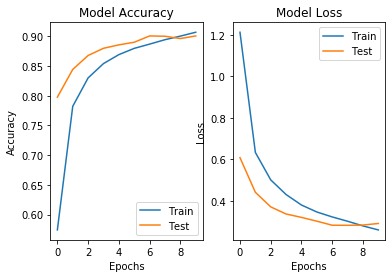

In [55]:
if __name__ == '__main__':
    
    m = main(Nh = [64, 128, 64, 32], Pd = [0.1, 0.05, 0.1, 0.2], epo = 10, bat_size = 1000)
    
    m.draw_plot()
    np.random.seed(999)
    rand = np.random.randint(1, 10000, 10)
    m.predict(rand)